In [2]:
import pandas as pd
import csv
import re
import spacy
import en_core_web_sm

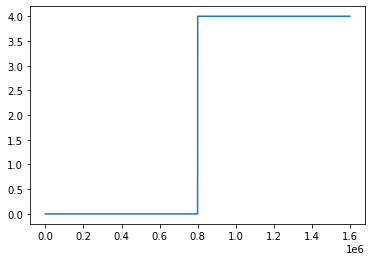

In [3]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv",quoting=csv.QUOTE_ALL,encoding='latin-1',header=None)
df.columns = ['Sentiment','ID','Date','Query','User_ID','Text']
df.head()

df['Sentiment'].plot()
df['Sentiment'].describe()
df['Sentiment'].fillna(value=df['Sentiment'].mode(),inplace=True)
_ = df.pop('ID')
_ = df.pop('Date')
_ = df.pop('Query')
_ = df.pop('User_ID')
df.dropna(subset=['Text'],inplace=True)
target = df.pop(item='Sentiment')

nlp = en_core_web_sm.load()
#nlp = spacy.load('en_core_web_lg')


In [4]:
def remove_hashtags(sentence):
    return re.sub(r'[^a-zA-Z]', " ",sentence)

def remove_usernames(sentence):
    return re.sub(r'@[A-Z0-9a-z_:]+','',sentence)

def remove_retweet_tags(sentence):
    return re.sub(r'^[RT]+','',sentence)

def remove_urls(sentence):
    return re.sub(r'(http|https|ftp)?://[A-Za-z0-9./]+','',sentence)

def clean_tweet(tweet):
    tweet = remove_usernames(tweet)
    tweet = remove_retweet_tags(tweet)
    tweet = remove_urls(tweet)
    tweet = remove_hashtags(tweet)
    return tweet.strip()

def remove_stopwords(tweet):
    return " ".join([word for word in tweet.split(" ") if word.lower() not in nlp.Defaults.stop_words])

def preproccess_pipeline(tweet):
    tweet = clean_tweet(tweet)
    tweet = remove_stopwords(tweet)
    return tweet


In [5]:
df['Text'] = df['Text'].apply(preproccess_pipeline)
df.head()

,Text
0,Awww s bummer shoulda got David Carr Day D
1,upset t update Facebook texting cry result ...
2,dived times ball Managed save rest bounds
3,body feels itchy like fire
4,s behaving m mad t


In [6]:
print(type(df['Text']))
i = 1
for index, row in df.iterrows():
    print(row.to_string())
    if i == 10:
        break
    i += 1

<class 'pandas.core.series.Series'>
Text    Awww  s bummer   shoulda got David Carr Day   D
Text    upset t update Facebook texting    cry result ...
Text    dived times ball  Managed save      rest bounds
Text    body feels itchy like fire
Text     s behaving  m mad   t
Text    crew
Text    Need hug
Text    hey  long time  Yes   Rains bit  bit  LOL   m ...
Text    nope didn t
Text    que muera


In [7]:
def buildTestSet(search_keyword):
    try:
        tweets_fetched = []
        for index, row in df.iterrows():
            if search_keyword in row.to_string():
                tweets_fetched.append(row.to_string())
        
        print("Fetched " + str(len(tweets_fetched)) + " tweets for the term " + search_keyword)
        
        return [{"text":status.text, "label":None} for status in tweets_fetched]
    except Exception as e:
        print(e)
        return None

In [8]:
buildTestSet("shoulda")

Fetched 239 tweets for the term shoulda
'str' object has no attribute 'text'


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utkarsh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


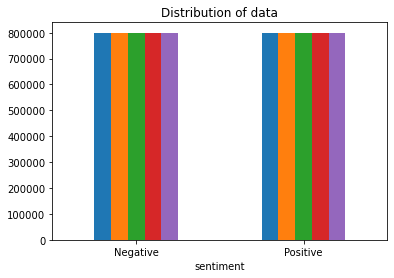

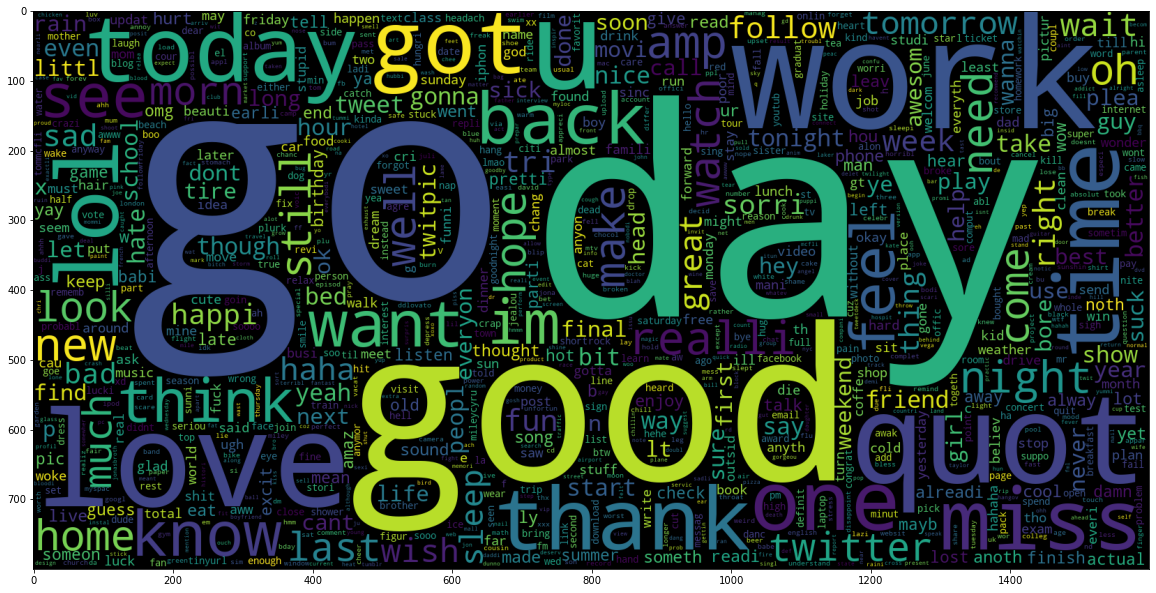

In [16]:
from sklearn.linear_model import LogisticRegression 
classifier1=LogisticRegression(random_state=0)
classifier1.fit(x_train, y_train) 
y_pred1=classifier1.predict_proba(x_test)

In [17]:
from sklearn.naive_bayes import MultinomialNB
classifier2=MultinomialNB()
classifier2.fit(x_train, y_train)
y_pred2=classifier2.predict_proba(x_test)

In [18]:
from sklearn.svm import LinearSVC  
classifier3=LinearSVC(random_state=42, max_iter=200)
classifier3.fit(x_train, y_train)
y_pred3=classifier3.decision_function(x_test)

/opt/anaconda3/envs/python-ws/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [19]:
from sklearn.linear_model import  SGDClassifier
classifier4 =  SGDClassifier(random_state=42, max_iter=200)
classifier4.fit(x_train, y_train) 
y_pred4 = classifier4.decision_function(x_test)

In [20]:
from sklearn.tree import DecisionTreeClassifier 
classifier5=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier5.fit(x_train, y_train)
y_pred5=classifier5.predict_proba(x_test)

In [22]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
#plot_confusion_matrix(classifier,x_test,y_test,values_format='d')
#plt.show()
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred,average='macro'))
print(precision_score(y_test,y_pred,average='macro'))
print(recall_score(y_test,y_pred,average='macro'))
print(classification_report(y_test, y_pred))

#plot_roc_curve(classifier,x_test,y_test)

print(roc_auc_score(y_test,y_pred,average='macro'))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [ ]:
from sklearn.metrics import roc_curve
print(len(y_pred))

print(y_pred.shape)
#y_pred = y_pred[:,1]
rad_fpr, rad_tpr,_= roc_curve(y_test,y_pred,pos_label=4)
#roc_auc = auc(lr_fpr, lr_tpr)
print(rad_fpr.shape)
print(rad_tpr.shape)
plt.plot(rad_fpr, rad_tpr,  marker='.', label='Random Forest' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

In [ ]:
from sklearn.metrics import roc_curve
y_pred1 = y_pred1[:,1]
print(y_pred1.shape)
lr_fpr, lr_tpr,_= roc_curve(y_test,y_pred1,pos_label=4)
#roc_auc = auc(lr_fpr, lr_tpr)
print(lr_fpr.shape)
print(lr_tpr.shape)
plt.plot(lr_fpr, lr_tpr,  marker='.', label='Logistic' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

In [ ]:
from sklearn.metrics import roc_curve
print(y_pred2.shape)
y_pred2 = y_pred2[:,1]
nb_fpr, nb_tpr,_= roc_curve(y_test,y_pred2,pos_label=4)
#roc_auc = auc(lr_fpr, lr_tpr)
print(nb_fpr.shape)
print(nb_tpr.shape)
plt.plot(nb_fpr, nb_tpr,  marker='.', label='Naive Bayes' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

In [ ]:
print(y_pred3.shape)
#y_pred3 = y_pred3[:,1]
svm_fpr, svm_tpr,_= roc_curve(y_test,y_pred3,pos_label=4)
#roc_auc = auc(lr_fpr, lr_tpr)
print(nb_fpr.shape)
print(nb_tpr.shape)
plt.plot(svm_fpr, svm_tpr,  marker='.', label='SVM' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

In [ ]:
from sklearn.metrics import roc_curve
print(y_pred4.shape)
#y_pred4 = y_pred4[:,1]
SGD_fpr, SGD_tpr,_= roc_curve(y_test,y_pred4,pos_label=4)
#roc_auc = auc(lr_fpr, lr_tpr)
print(SGD_fpr.shape)
print(SGD_tpr.shape)
plt.plot(SGD_fpr, SGD_tpr,  marker='.', label='SGDC' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

In [ ]:
from sklearn.metrics import roc_curve
print(y_pred5.shape)
y_pred5 = y_pred5[:,1]
dt_fpr, dt_tpr,_= roc_curve(y_test,y_pred5,pos_label=4)
#roc_auc = auc(lr_fpr, lr_tpr)
print(dt_fpr.shape)
print(dt_tpr.shape)
plt.plot(dt_fpr, dt_tpr,  marker='.', label='Decision Tree' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

In [ ]:
plt.show()

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs,pos_label=4)


plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rad_fpr, rad_tpr,  linestyle='-', label='Random Forest' )
plt.plot(lr_fpr, lr_tpr,  linestyle='--', label='Logistic' )
plt.plot(nb_fpr, nb_tpr,  linestyle='--', label='Naive Bayes' )
plt.plot(svm_fpr, svm_tpr,  linestyle='--', label='SVM' )
plt.plot(SGD_fpr, SGD_tpr,  linestyle='--', label='SGDC' )
plt.plot(dt_fpr, dt_tpr,  linestyle='--', label='Decision Tree' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()